In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sqlalchemy as sa
from tabulate import tabulate
import seaborn as sns

In [100]:
import urllib.request

In [101]:
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')
result = urllib.request.urlopen(request)
resulttext = result.read()

In [102]:
from bs4 import BeautifulSoup as BS

In [103]:
soup=BS(resulttext,'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of deadly earthquakes since 1900 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needi

In [104]:
table=soup.find_all(class_='wikitable')[0]

In [105]:
df = pd.read_html(str(table),header=0)[0]


In [106]:
df

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [107]:
df.info()
df.to_csv("earth_quake.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null float64
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: 

In [108]:
#df.replace(" ","NaN")

In [109]:
pattern=r'\(.*\)|\[.*\]|\D'
#pattern1= r'\(.*\)|\[.*\]|\D'
df['Other Source Deaths']=df['Other Source Deaths'].str.replace(pattern,"")


In [110]:
df['Other Source Deaths'].loc[1300:]


1300       NaN
1301       NaN
1302       NaN
1303       NaN
1304       NaN
1305       NaN
1306       NaN
1307       NaN
1308       NaN
1309       NaN
1310       NaN
1311       NaN
1312       NaN
1313       NaN
1314       NaN
1315       NaN
1316       NaN
1317        41
1318        60
1319       NaN
1320       215
1321        34
1322       295
1323       NaN
1324         1
1325        79
1326       189
1327      1115
1328    222517
1329       521
1330        42
1331         1
1332      2698
1333       181
1334       NaN
1335     15894
1336       150
1337       NaN
1338       111
1339       601
Name: Other Source Deaths, dtype: object

In [111]:
df['EM-DAT Total Deaths'] = df['EM-DAT Total Deaths'].str.replace(pattern, "")

In [112]:
pattern = r'[^\.\d]+'

In [113]:
df['Magnitude'] = df['Magnitude'].str.replace(pattern, '')

In [114]:
df.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN


In [115]:
# converting magnitude column to a numeric float column
df['Magnitude'] = pd.to_numeric(df['Magnitude'])

In [116]:
df.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null float64
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null float64
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes:

In [118]:
#converting other source deaths columns & EM-DAT total deaths to numeric columns
df['EM-DAT Total Deaths']=pd.to_numeric(df['EM-DAT Total Deaths'])
df['Other Source Deaths']=pd.to_numeric(df['Other Source Deaths'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null float64
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null float64
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null float64
Other Source Deaths                                  37 non-null float64
dtype

In [120]:
df


,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.000,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.900,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.700,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.500,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.400,NaN,NaN,NaN,4.0,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.200,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.800,NaN,NaN,NaN,1.0,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.900,NaN,NaN,NaN,1.0,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.900,NaN,NaN,NaN,86.0,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.500,NaN,NaN,NaN,4.0,NaN,NaN


In [121]:
#gives the max of the a & b and result is stored in a new column c
#df["C"] = df[["A", "B"]].max(axis=1) 

In [122]:
df["deaths"] = df[["PDE Total Deaths","Utsu Total Deaths","EM-DAT Total Deaths","Other Source Deaths"]].max(axis=1)

In [123]:
df.head(n=100)


,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0


In [201]:
year_of_quake = list(df['Origin (UTC)'].astype('str'))
year=[]

In [202]:
for date in year_of_quake:
    year.append(date[0:4])    
df['year']=year
df.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths,year
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,1900
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1901


In [203]:
df['Magnitude'].max()

9.5

In [204]:
#retreive a row value where the magnitude is max - 9.5 in our case
df.loc[df['Magnitude'].idxmax()]

Origin (UTC)                                                             1960-05-22 19:11
Present-day country and link to Wikipedia article    Chile (see 1960 Valdivia earthquake)
Lat                                                                               -38.235
Long                                                                              -73.047
Depth (km)                                                                             35
Magnitude                                                                             9.5
Secondary Effects                                                                       T
PDE Shaking Deaths                                                                    NaN
PDE Total Deaths                                                                      NaN
Utsu Total Deaths                                                                    5700
EM-DAT Total Deaths                                                                  6000
Other Sour

In [205]:
#retrieve the row details where the deaths are max -- 
df.loc[df['deaths'].idxmax()]

Origin (UTC)                                                             1976-07-27 19:42
Present-day country and link to Wikipedia article    China (see 1976 Tangshan earthquake)
Lat                                                                                39.605
Long                                                                              117.888
Depth (km)                                                                           16.7
Magnitude                                                                             7.6
Secondary Effects                                                                     NaN
PDE Shaking Deaths                                                                 655237
PDE Total Deaths                                                                   655237
Utsu Total Deaths                                                                  242800
EM-DAT Total Deaths                                                                242000
Other Sour

In [206]:
df.loc[df['Magnitude'].idxmin()]

Origin (UTC)                                         1986-03-12 16:32
Present-day country and link to Wikipedia article       United States
Lat                                                            47.470
Long                                                         -115.800
Depth (km)                                                          1
Magnitude                                                           2
Secondary Effects                                                 NaN
PDE Shaking Deaths                                                  0
PDE Total Deaths                                                    1
Utsu Total Deaths                                                   1
EM-DAT Total Deaths                                               NaN
Other Source Deaths                                               NaN
deaths                                                              1
year                                                             1986
Name: 774, dtype: ob

In [207]:
df.loc[df['deaths'].idxmin()]

Origin (UTC)                                         1966-03-07 21:29
Present-day country and link to Wikipedia article               China
Lat                                                            37.388
Long                                                          114.963
Depth (km)                                                        7.7
Magnitude                                                         6.6
Secondary Effects                                                 NaN
PDE Shaking Deaths                                                NaN
PDE Total Deaths                                                  NaN
Utsu Total Deaths                                                 NaN
EM-DAT Total Deaths                                                 0
Other Source Deaths                                               NaN
deaths                                                              0
year                                                             1966
Name: 435, dtype: ob

In [208]:
df.loc[df['Magnitude'] >= 9.0]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths,year
332,1952-11-04 16:58,Russian Federation (see Kamchatka earthquakes),52.755,160.057,22.2,9.0,T,NaN,NaN,NaN,NaN,NaN,NaN,1952
396,1960-05-22 19:11,Chile (see 1960 Valdivia earthquake),-38.235,-73.047,35,9.5,T,NaN,NaN,5700.0,6000.0,NaN,6000.0,1960
416,1964-03-28 03:36,United States (see 1964 Alaska earthquake),61.017,-147.648,6.6,9.2,T,NaN,NaN,131.0,131.0,NaN,131.0,1964
1238,2004-12-26 00:58,Indonesia (see 2004 Indian Ocean earthquake),3.287,95.972,30,9.1,"T,L",NaN,297200.0,NaN,NaN,231000.0,297200.0,2004
1335,2011-03-11 14:46,Japan (see 2011 Tōhoku earthquake),38.322,142.369,24.4,9.0,T,NaN,NaN,NaN,NaN,15894.0,15894.0,2011


In [209]:
df['deaths'].nlargest(5)

583     655237.0
1238    297200.0
102     235502.0
1328    222517.0
140     200000.0
Name: deaths, dtype: float64

In [210]:
df['Magnitude'].nlargest(5)

396     9.5
416     9.2
1238    9.1
332     9.0
1335    9.0
Name: Magnitude, dtype: float64

In [211]:
df.deaths.nlargest(5)

583     655237.0
1238    297200.0
102     235502.0
1328    222517.0
140     200000.0
Name: deaths, dtype: float64

In [212]:
#df[df[df.columns[1]].isin(list)]
#merge_data.loc[merge_data['Year'].isin([2002,2007,2012])]
df_max_deaths = df.loc[df['deaths'].isin([655237.0,297200.0,235502.0,222517.0,200000.0])]

In [213]:
print(df_max_deaths)

          Origin (UTC) Present-day country and link to Wikipedia article  \
102   1920-12-16 12:05               China (see 1920 Haiyuan earthquake)   
140   1927-05-22 22:32                China (see 1927 Gulang earthquake)   
583   1976-07-27 19:42              China (see 1976 Tangshan earthquake)   
1238  2004-12-26 00:58      Indonesia (see 2004 Indian Ocean earthquake)   
1328  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   

         Lat     Long Depth (km)  Magnitude Secondary Effects  \
102   36.601  105.317         25        8.6               NaN   
140   37.386  102.311         25        7.9               NaN   
583   39.605  117.888       16.7        7.6               NaN   
1238   3.287   95.972         30        9.1               T,L   
1328  18.457  -72.533         13        7.0               NaN   

      PDE Shaking Deaths  PDE Total Deaths  Utsu Total Deaths  \
102                  NaN               NaN           235502.0   
140                  N

In [214]:
df_max_magnitude=df.loc[df['Magnitude'].isin([9.0,9.1,9.2,9.5])]

In [215]:
print(df_max_magnitude[['Origin (UTC)','Present-day country and link to Wikipedia article','Magnitude','deaths','year']])

          Origin (UTC) Present-day country and link to Wikipedia article  \
332   1952-11-04 16:58    Russian Federation (see Kamchatka earthquakes)   
396   1960-05-22 19:11              Chile (see 1960 Valdivia earthquake)   
416   1964-03-28 03:36        United States (see 1964 Alaska earthquake)   
1238  2004-12-26 00:58      Indonesia (see 2004 Indian Ocean earthquake)   
1335  2011-03-11 14:46                Japan (see 2011 Tōhoku earthquake)   

      Magnitude    deaths  year  
332         9.0       NaN  1952  
396         9.5    6000.0  1960  
416         9.2     131.0  1964  
1238        9.1  297200.0  2004  
1335        9.0   15894.0  2011  


In [216]:
print(df_max_deaths[['Origin (UTC)','Present-day country and link to Wikipedia article','Magnitude','deaths','year']])

          Origin (UTC) Present-day country and link to Wikipedia article  \
102   1920-12-16 12:05               China (see 1920 Haiyuan earthquake)   
140   1927-05-22 22:32                China (see 1927 Gulang earthquake)   
583   1976-07-27 19:42              China (see 1976 Tangshan earthquake)   
1238  2004-12-26 00:58      Indonesia (see 2004 Indian Ocean earthquake)   
1328  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   

      Magnitude    deaths  year  
102         8.6  235502.0  1920  
140         7.9  200000.0  1927  
583         7.6  655237.0  1976  
1238        9.1  297200.0  2004  
1328        7.0  222517.0  2010  


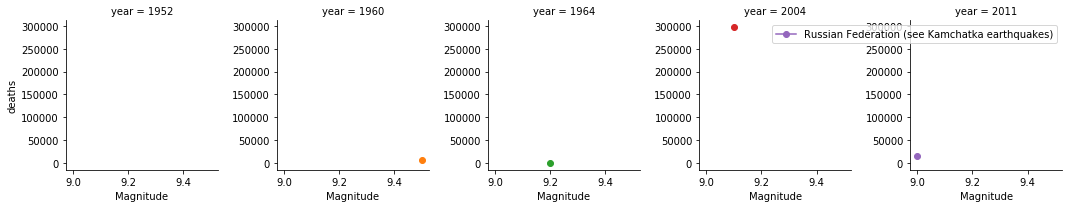

In [222]:
map_max_magnitude = sns.FacetGrid(df_max_magnitude,col="year",hue="year")
map_max_magnitude.map(plt.plot,"Magnitude","deaths",marker="o")
#a.set(xticks=[2002, 2007, 2012], yticks=[0,10,20,30,40,50,60,70,80,90,100])
plt.legend(df_max_magnitude['Present-day country and link to Wikipedia article'])
plt.show()

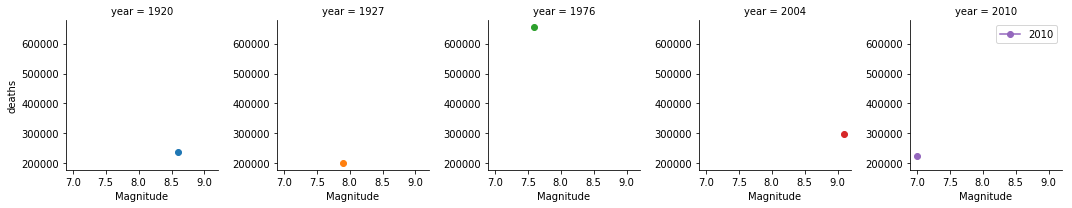

In [223]:
map_max_magnitude = sns.FacetGrid(df_max_deaths,col="year",hue="year")
map_max_magnitude.map(plt.plot,"Magnitude","deaths",marker="o")
#a.set(xticks=[2002, 2007, 2012], yticks=[0,10,20,30,40,50,60,70,80,90,100])
plt.legend()
plt.show()